# This file is used to train

In [1]:
import torch
import numpy as np
import pandas as pd
from sc_model import SC_LSTM as Model

# Device init

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if device.type == 'cuda':
    !nvidia-smi
    print(torch.cuda.get_device_name(0))

else:
    print("No GPU :(")

Mon Jul 10 19:04:25 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.41.03              Driver Version: 530.41.03    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650 Ti      Off| 00000000:01:00.0 Off |                  N/A |
| N/A   38C    P8                3W /  N/A|    447MiB /  4096MiB |     15%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
device = 'cpu'

## Loading the data

In [4]:
# Create a dataframe with 5 (Label_Number, Duration, Importance, Start_time, Date) columns and 6 rows
df = pd.DataFrame(np.random.randint(0, 100, size=(10, 5)), columns=['Label Number', 'Duration', 'Importance', 'Start Time', 'Date'])

# Fill it with 10 individs manually
ind_1 = [1, 30, 0, '03:00', '10/07/2023']
ind_2 = [1, 60, 1, '09:00', '10/07/2023']
ind_3 = [1, 120, 1, '12:00', '10/07/2023']
ind_4 = [1, 30, 1, '15:00', '10/07/2023']
ind_5 = [1, 60, 0, '19:00', '10/07/2023']
ind_6 = [1, 120, 0, '22:00', '10/07/2023']
ind_7 = [1, 240, 1, '02:00', '11/07/2023']
ind_8 = [1, 30, 1, '06:00', '11/07/2023']
ind_9 = [1, 60, 0, '11:00', '11/07/2023']
ind_10 = [1, 240, 0, '16:00', '11/07/2023']

df.loc[0] = ind_1
df.loc[1] = ind_2
df.loc[2] = ind_3
df.loc[3] = ind_4
df.loc[4] = ind_5
df.loc[5] = ind_6
df.loc[6] = ind_7
df.loc[7] = ind_8
df.loc[8] = ind_9
df.loc[9] = ind_10

# Save it into Data/test_schedule.csv
df.to_csv('../Data/test_schedule.csv', index=False)
df

,Label Number,Duration,Importance,Start Time,Date
0,1,30,0,03:00,10/07/2023
1,1,60,1,09:00,10/07/2023
2,1,120,1,12:00,10/07/2023
3,1,30,1,15:00,10/07/2023
4,1,60,0,19:00,10/07/2023
5,1,120,0,22:00,10/07/2023
6,1,240,1,02:00,11/07/2023
7,1,30,1,06:00,11/07/2023
8,1,60,0,11:00,11/07/2023
9,1,240,0,16:00,11/07/2023


In [5]:
from Data.PreprocessorOfGeneratedData import Preprocessor

preproc = Preprocessor()

input_data, type_vector, output_data = preproc.preprocess('../Data/test_schedule.csv')

In [6]:
input_data

,Label Number_0,Label Number_1,Label Number_2,Label Number_3,Duration,Importance,Time_Min,Time_Min_sin,Time_Min_cos,Date_Categorical,Date_Day_sin,Date_Day_cos,Date_Month_sin,Date_Month_cos
0,0,1,0,0,0.125,0.00,-0.122222,0.000000e+00,1.000000,0.523288,0.897805,-0.440394,-0.5,-0.866025
1,0,1,0,0,0.250,0.25,0.252778,7.071068e-01,-0.707107,0.523288,0.897805,-0.440394,-0.5,-0.866025
2,0,1,0,0,0.500,0.25,0.377778,1.224647e-16,-1.000000,0.523288,0.897805,-0.440394,-0.5,-0.866025
3,0,1,0,0,0.125,0.25,-0.122222,0.000000e+00,1.000000,0.523288,0.897805,-0.440394,-0.5,-0.866025
4,0,1,0,0,0.250,0.00,0.669444,-9.659258e-01,0.258819,0.523288,0.897805,-0.440394,-0.5,-0.866025
5,0,1,0,0,0.500,0.00,-0.122222,0.000000e+00,1.000000,0.523288,0.897805,-0.440394,-0.5,-0.866025
6,0,1,0,0,1.000,0.25,0.002083,5.000000e-01,0.866025,0.526027,0.790776,-0.612106,-0.5,-0.866025
7,0,1,0,0,0.125,0.25,-0.081250,0.000000e+00,1.000000,0.526027,0.790776,-0.612106,-0.5,-0.866025
8,0,1,0,0,0.250,0.00,0.377083,2.588190e-01,-0.965926,0.526027,0.790776,-0.612106,-0.5,-0.866025
9,0,1,0,0,1.000,0.00,0.585417,-8.660254e-01,-0.500000,0.526027,0.790776,-0.612106,-0.5,-0.866025


In [7]:
output_data = np.abs(np.array(output_data, dtype=np.float64))
pd.DataFrame(output_data)

,0,1,2
0,0.122222,0.017361,0.003472
1,0.252778,0.041667,0.000000
2,0.377778,0.083333,0.000000
3,0.122222,0.020833,0.000000
4,0.669444,0.041667,0.000000
5,0.122222,0.077083,0.006250
6,0.002083,0.166667,0.000000
7,0.081250,0.020833,0.000000
8,0.377083,0.041667,0.000000
9,0.585417,0.166667,0.000000


## Init the model

In [8]:
in_features = 14
out_features = 3
batch_size = 1
n_layers = 1
hidden_size = 124
hidden_injector = 64

free_time_slots = [[0, 1]]

# Create the model
SC_LSTM = Model(in_features, n_layers, hidden_size, out_features, batch_size, hidden_injector=hidden_injector).to(device)

# Load the weights
SC_LSTM.load_state_dict(torch.load('sc_lstm_weights.pth'))

<All keys matched successfully>

In [9]:
input_data = np.array(input_data, dtype=np.float32)
output_data = np.array(output_data, dtype=np.float32)

In [10]:
# Test the model on input data
SC_LSTM.reset_states()
SC_LSTM.eval_model()
predictions = []
real = []

for i in range(0, len(input_data)):
    X = torch.Tensor([input_data[i]]).type(torch.float32).to(device)
    Y = torch.Tensor([output_data[i]]).type(torch.float32).to(device)

    Y_pred = SC_LSTM.forward(X, task_type='resched', free_time_slots=free_time_slots, save_states=False)

    predictions.append(Y_pred[0].numpy())
    real.append(Y[0].numpy())
    print(f"{i+1}) Predicted: {Y_pred[0]}\n Real: {Y[0]}\n Error: {torch.abs(Y_pred[0] - Y[0])}\n")

# Print mean, min, and max error for each column
errors = np.abs(np.array(predictions) - np.array(real))
print(f"Mean error: {np.mean(errors, axis=0)}")
print(f"Min error: {np.min(errors, axis=0)}")
print(f"Max error: {np.max(errors, axis=0)}")


# Mean error: [0.03400678 0.05854695 0.00183747]
# Min error: [0.00568134 0.01077583 0.00074498]
# Max error: [0.07480101 0.23154303 0.00484255]

1) Predicted: tensor([0.3922, 0.1204, 0.0250])
 Real: tensor([0.1222, 0.0174, 0.0035])
 Error: tensor([0.2700, 0.1031, 0.0215])

2) Predicted: tensor([0.5518, 0.0674, 0.0026])
 Real: tensor([0.2528, 0.0417, 0.0000])
 Error: tensor([0.2990, 0.0257, 0.0026])

3) Predicted: tensor([0.7855, 0.1095, 0.0039])
 Real: tensor([0.3778, 0.0833, 0.0000])
 Error: tensor([0.4077, 0.0261, 0.0039])

4) Predicted: tensor([0.3875, 0.1128, 0.0217])
 Real: tensor([0.1222, 0.0208, 0.0000])
 Error: tensor([0.2652, 0.0919, 0.0217])

Intermediary output: tensor([[0.9685, 0.1600, 0.0785]])
5) Predicted: tensor([0.9685, 0.1600, 0.0785])
 Real: tensor([0.6694, 0.0417, 0.0000])
 Error: tensor([0.2990, 0.1183, 0.0785])

6) Predicted: tensor([0.3869, 0.2002, 0.0244])
 Real: tensor([0.1222, 0.0771, 0.0063])
 Error: tensor([0.2646, 0.1232, 0.0181])

7) Predicted: tensor([0.2473, 0.2450, 0.0186])
 Real: tensor([0.0021, 0.1667, 0.0000])
 Error: tensor([0.2452, 0.0783, 0.0186])

8) Predicted: tensor([0.3560, 0.1128, 0.0

/tmp/ipykernel_155113/3946018803.py:8: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  X = torch.Tensor([input_data[i]]).type(torch.float32).to(device)


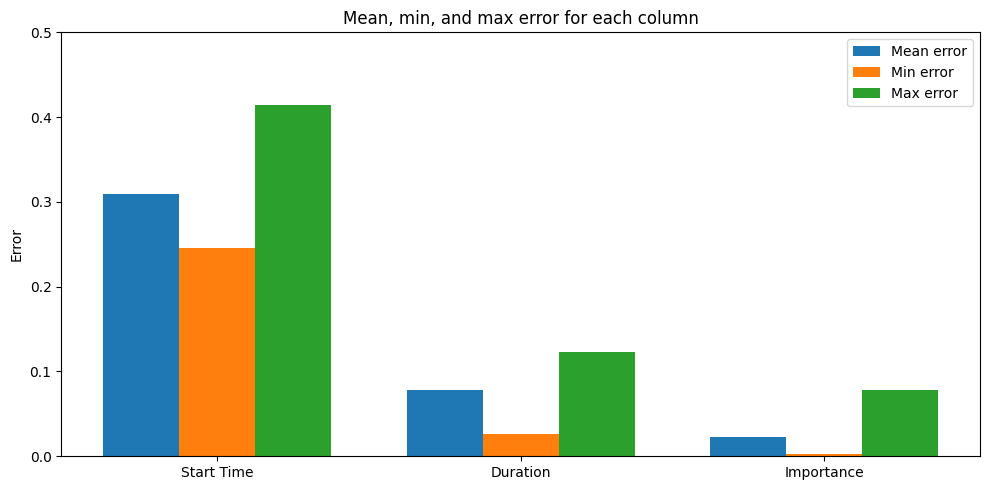

In [11]:
# Plot the barchart of an errors
import matplotlib.pyplot as plt
import numpy as np

labels = ['Start Time', 'Duration', 'Importance']
mean_errors = np.mean(errors, axis=0)
min_errors = np.min(errors, axis=0)
max_errors = np.max(errors, axis=0)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width, mean_errors, width, label='Mean error')
rects2 = ax.bar(x, min_errors, width, label='Min error')
rects3 = ax.bar(x + width, max_errors, width, label='Max error')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Error')
ax.set_title('Mean, min, and max error for each column')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.set_ylim([0, 0.5])

fig.tight_layout()

plt.show()